<a href="https://colab.research.google.com/github/Ramyanee/spam_detection/blob/master/spam_detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [0]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-05-12 08:32:18--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-05-12 08:32:18 (9.28 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

In [0]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [0]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ['labels','data']

In [0]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.b_labels = df.labels.map({'ham':0,'spam':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
df.b_labels

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [0]:
Y = df.b_labels.values

In [0]:
df_train, df_test, ytrain, ytest = tts(df.data,Y, test_size = 0.33)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer as tk

In [0]:
MAX_VOCAB = 20000
tknzr = tk(num_words = MAX_VOCAB)
tknzr.fit_on_texts(df_train)
sq_train = tknzr.texts_to_sequences(df_train)
sq_test = tknzr.texts_to_sequences(df_test)

In [0]:
w2i = tknzr.word_index

In [0]:
V = len(w2i)

In [0]:
V

7077

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences as pd_sq

In [0]:
data_train = pd_sq(sq_train)

In [0]:
data_train.shape # N * T

(3733, 189)

In [0]:
T = data_train.shape[1]

In [0]:
data_test = pd_sq(sq_test, maxlen = T)

In [0]:
data_train.shape

(3733, 189)

In [0]:
#creating the model

In [0]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model


In [0]:
#embedding dimensionality
D = 20
# hidden state dimensionality
M =15

i = Input(shape = (T,) )
x=  Embedding(V+1,D)(i)
x=LSTM(M, return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x= Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [0]:
model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [0]:
r  = model.fit(
    data_train,
    ytrain,
    epochs = 10,
    validation_data = (data_test, ytest)
)

Epoch 1/10
117/117 [==============================] - 9s 77ms/step - loss: 0.4568 - accuracy: 0.8653 - val_loss: 0.3559 - val_accuracy: 0.8651
Epoch 2/10
117/117 [==============================] - 8s 71ms/step - loss: 0.3034 - accuracy: 0.8663 - val_loss: 0.2693 - val_accuracy: 0.8651
Epoch 3/10
117/117 [==============================] - 8s 72ms/step - loss: 0.2276 - accuracy: 0.8663 - val_loss: 0.2095 - val_accuracy: 0.8651
Epoch 4/10
117/117 [==============================] - 9s 73ms/step - loss: 0.1688 - accuracy: 0.9376 - val_loss: 0.1592 - val_accuracy: 0.9766
Epoch 5/10
117/117 [==============================] - 9s 73ms/step - loss: 0.1140 - accuracy: 0.9920 - val_loss: 0.1099 - val_accuracy: 0.9837
Epoch 6/10
117/117 [==============================] - 9s 73ms/step - loss: 0.0729 - accuracy: 0.9960 - val_loss: 0.0843 - val_accuracy: 0.9880
Epoch 7/10
117/117 [==============================] - 9s 74ms/step - loss: 0.0504 - accuracy: 0.9971 - val_loss: 0.0696 - val_accuracy: 0.9891

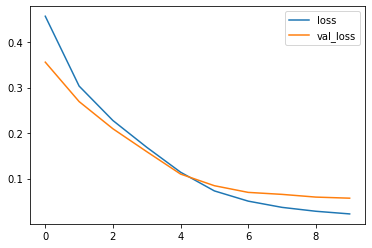

In [0]:
plt.plot(r.history['loss'], label = 'loss ')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()